## Package Importing

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [320]:
crime_in = pd.read_csv('crimedata2.csv')
print(crime_in.shape)
crime_in.head()
print(crime_in.dtypes)

(2215, 147)
communityname          object
state                  object
countyCode             object
communityCode          object
fold                    int64
                        ...  
autoTheftPerPop        object
arsons                 object
arsonsPerPop           object
ViolentCrimesPerPop    object
nonViolPerPop          object
Length: 147, dtype: object


## Data initial exploration

In [321]:
crime_in = crime_in.replace('?', np.nan)
print(crime_in.isnull().sum())
# drop rows with violent crime rate missing
crime_in = crime_in.dropna(subset=['ViolentCrimesPerPop'])
# convert violent crimes perpop to float
crime_in['ViolentCrimesPerPop'] = crime_in['ViolentCrimesPerPop'].astype(float)
crime_in['rapesPerPop'] = crime_in['rapesPerPop'].astype(float)
crime_in['murdPerPop'] = crime_in['murdPerPop'].astype(float)
crime_in['assaultPerPop'] = crime_in['assaultPerPop'].astype(float)
crime_in = crime_in.interpolate(method='nearest')

communityname             0
state                     0
countyCode             1221
communityCode          1224
fold                      0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 147, dtype: int64


/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_11128/595300040.py:10: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  crime_in = crime_in.interpolate(method='nearest')


In [322]:
crime_in.head()
print(crime_in.shape)

(1994, 147)


In [323]:
crime_in.describe()

fold    population  householdsize  racepctblack  racePctWhite  \
count  1994.000000  1.994000e+03    1994.000000   1994.000000   1994.000000   
mean      5.511535  5.225143e+04       2.706810      9.509694     83.489218   
std       2.882916  2.021475e+05       0.343156     14.101979     16.393607   
min       1.000000  1.000500e+04       1.600000      0.000000      2.680000   
25%       3.000000  1.435925e+04       2.490000      0.940000     75.882500   
50%       5.000000  2.268100e+04       2.650000      3.150000     89.605000   
75%       8.000000  4.315375e+04       2.850000     11.965000     95.987500   
max      10.000000  7.322564e+06       5.280000     96.670000     99.630000   

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
count   1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean       2.750787     8.481610    14.431214    27.617357    13.985421  ...   
std        4.648200    15.208788     4.478570     6.148044     5.896879  ...   
min        0.030000     0.120000     4.580000     9.380000     4.640000  ...   
25%        0.612500     0.920000    12.230000    24.380000    11.340000  ...   
50%        1.240000     2.340000    13.620000    26.765000    12.540000  ...   
75%        2.737500     8.610000    15.387500    29.180000    14.357500  ...   
max       57.460000    95.290000    54.400000    70.510000    63.620000  ...   

       PctSameState85     LandArea       PopDens  PctUsePubTrans  \
count     1994.000000  1994.000000   1994.000000     1994.000000   
mean        87.732728    27.962889   2789.862487        3.062944   
std          7.448660   114.827752   2920.185784        4.963083   
min         32.830000     0.900000     10.000000        0.000000   
25%         84.732500     7.400000   1170.825000        0.350000   
50%         89.635000    13.700000   1996.100000        1.220000   
75%         92.730000    25.775000   3270.400000        3.377500   
max         99.900000  3569.800000  44229.900000       54.330000   

       LemasPctOfficDrugUn      murders   murdPerPop  rapesPerPop  \
count          1994.000000  1994.000000  1994.000000  1994.000000   
mean              1.009965     7.434303     5.981364    36.248245   
std               2.913227    56.031368     9.131550    34.255538   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.000000     0.000000     0.000000    11.582500   
50%               0.000000     1.000000     2.500000    26.930000   
75%               0.000000     3.000000     8.632500    51.427500   
max              48.440000  1946.000000    91.090000   401.350000   

       assaultPerPop  ViolentCrimesPerPop  
count    1994.000000          1994.000000  
mean      380.644724           589.078922  
std       416.373512           614.784518  
min         0.000000             0.000000  
25%        94.870000           161.700000  
50%       237.065000           374.060000  
75%       519.647500           794.400000  
max      3486.140000          4877.060000  

[8 rows x 107 columns]

In [324]:
columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop',
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop']
crime_in[columns] = crime_in[columns].astype(float)

In [325]:
crime_in.loc[(crime_in['population'] >= 10000) & (crime_in['population'] < 25000), 'size'] = 'small'
crime_in.loc[(crime_in['population'] >= 25001) & (crime_in['population'] < 50000), 'size'] = 'medium'
crime_in.loc[(crime_in['population'] >= 50001) & (crime_in['population'] < 200000), 'size'] = 'large'
crime_in.loc[crime_in['population'] >= 200000, 'size'] = 'superLarge'
crime_in.head()

communityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1     11980.0   
1           Marpletownship    PA         45         47616     1     23123.0   
2               Tigardcity    OR        NaN           NaN     1     29344.0   
3         Gloversvillecity    NY         35         29443     1     16656.0   
5          Springfieldcity    MO        NaN           NaN     1    140494.0   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglPerPop  \
0           3.10          1.37         91.78          6.50  ...       114.85   
1           2.82          0.80         95.57          3.44  ...       242.37   
2           2.43          0.74         94.33          3.43  ...       758.14   
3           2.40          1.70         97.35          0.50  ...      1301.78   
5           2.45          2.51         95.65          0.90  ...      1386.46   

   larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  arsonsPerPop  \
0        138     1132.08         16           131.26       2         16.41   
1        376     1598.78         26           110.55       1          4.25   
2       1797     4972.19        136            376.3      22         60.87   
3        716     4142.56         47           271.93     NaN           NaN   
5       7690     5091.64        454            300.6     134         88.72   

   ViolentCrimesPerPop  nonViolPerPop    size  
0                41.02        1394.59   small  
1               127.56        1955.95   small  
2               218.59        6167.51  medium  
3               306.64            NaN   small  
5               442.95        6867.42   large  

[5 rows x 148 columns]

In [326]:
columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop',
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop', 'size']
crime_in[columns].describe()

agePct12t29  PctLess9thGrade  PctNotHSGrad  PctBSorMore    population  \
count  1994.000000      1994.000000   1994.000000  1994.000000  1.994000e+03   
mean     27.617357         9.444203     22.700687    22.991550  5.225143e+04   
std       6.148044         6.843854     11.061712    12.514273  2.021475e+05   
min       9.380000         0.200000      2.090000     1.630000  1.000500e+04   
25%      24.380000         4.770000     14.195000    14.090000  1.435925e+04   
50%      26.765000         7.920000     21.655000    19.625000  2.268100e+04   
75%      29.180000        12.245000     29.665000    28.935000  4.315375e+04   
max      70.510000        49.890000     73.660000    73.630000  7.322564e+06   

        murdPerPop  assaultPerPop  rapesPerPop  ViolentCrimesPerPop  
count  1994.000000    1994.000000  1994.000000          1994.000000  
mean      5.981364     380.644724    36.248245           589.078922  
std       9.131550     416.373512    34.255538           614.784518  
min       0.000000       0.000000     0.000000             0.000000  
25%       0.000000      94.870000    11.582500           161.700000  
50%       2.500000     237.065000    26.930000           374.060000  
75%       8.632500     519.647500    51.427500           794.400000  
max      91.090000    3486.140000   401.350000          4877.060000

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

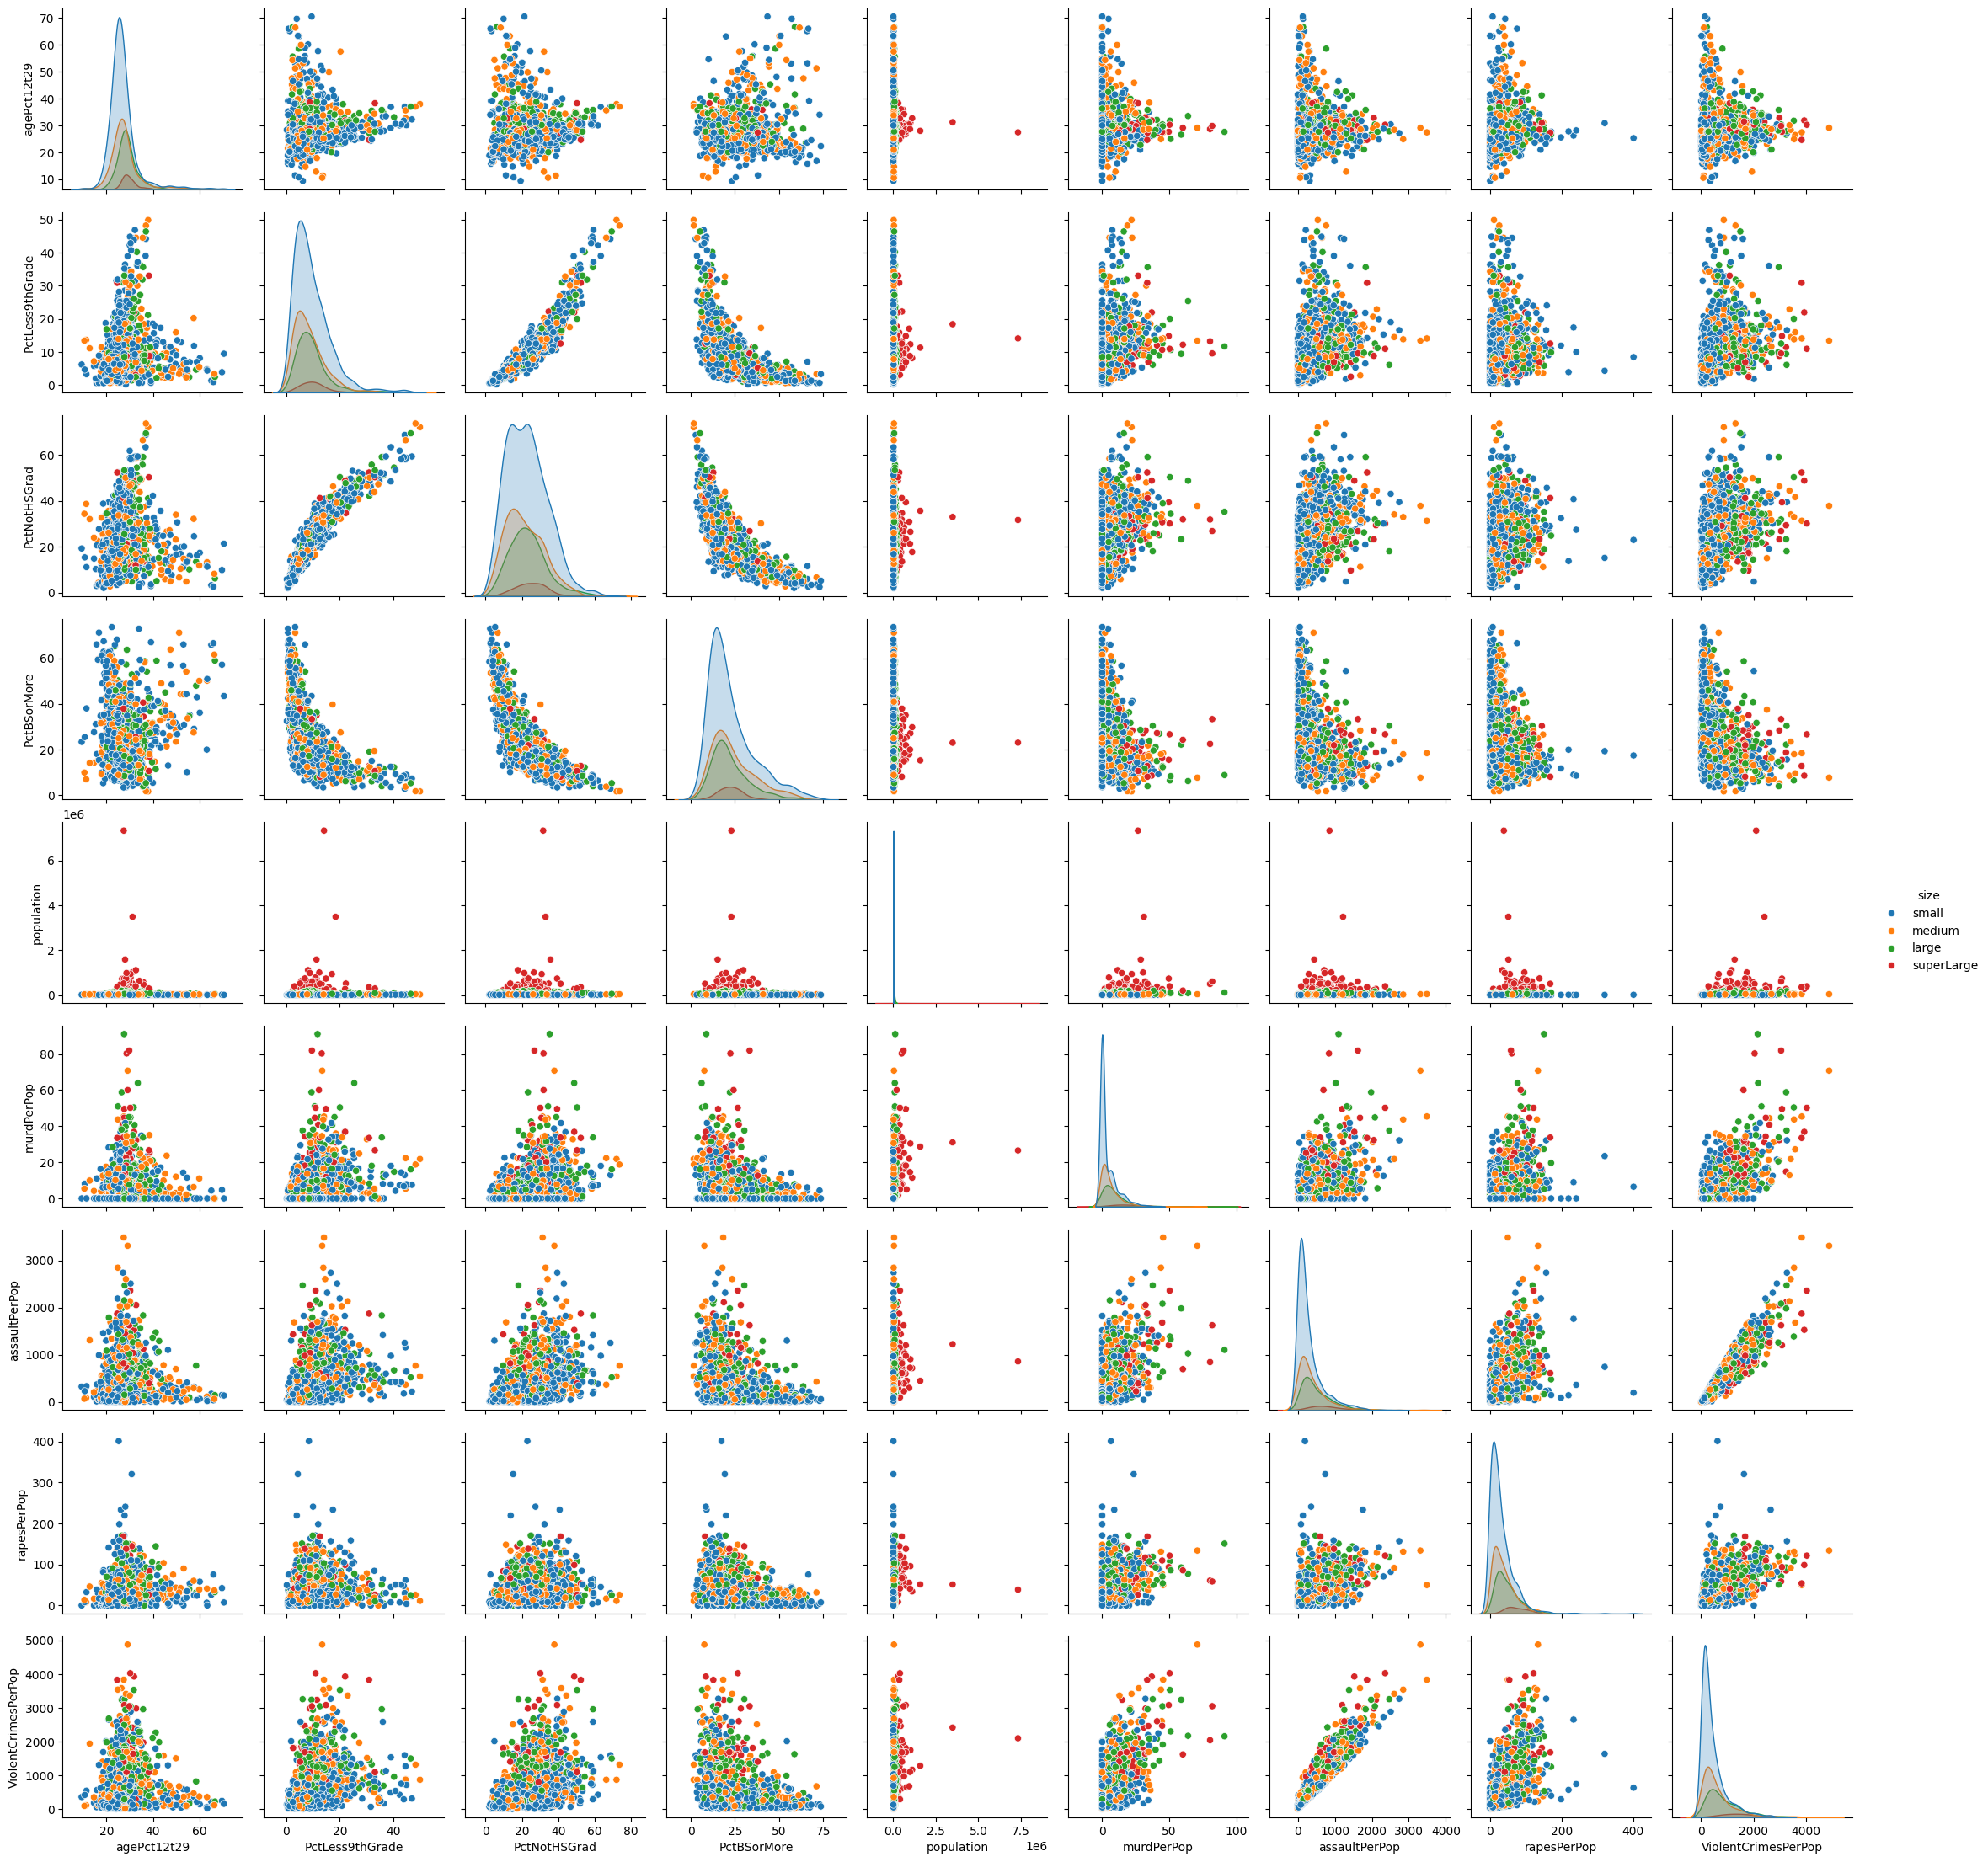

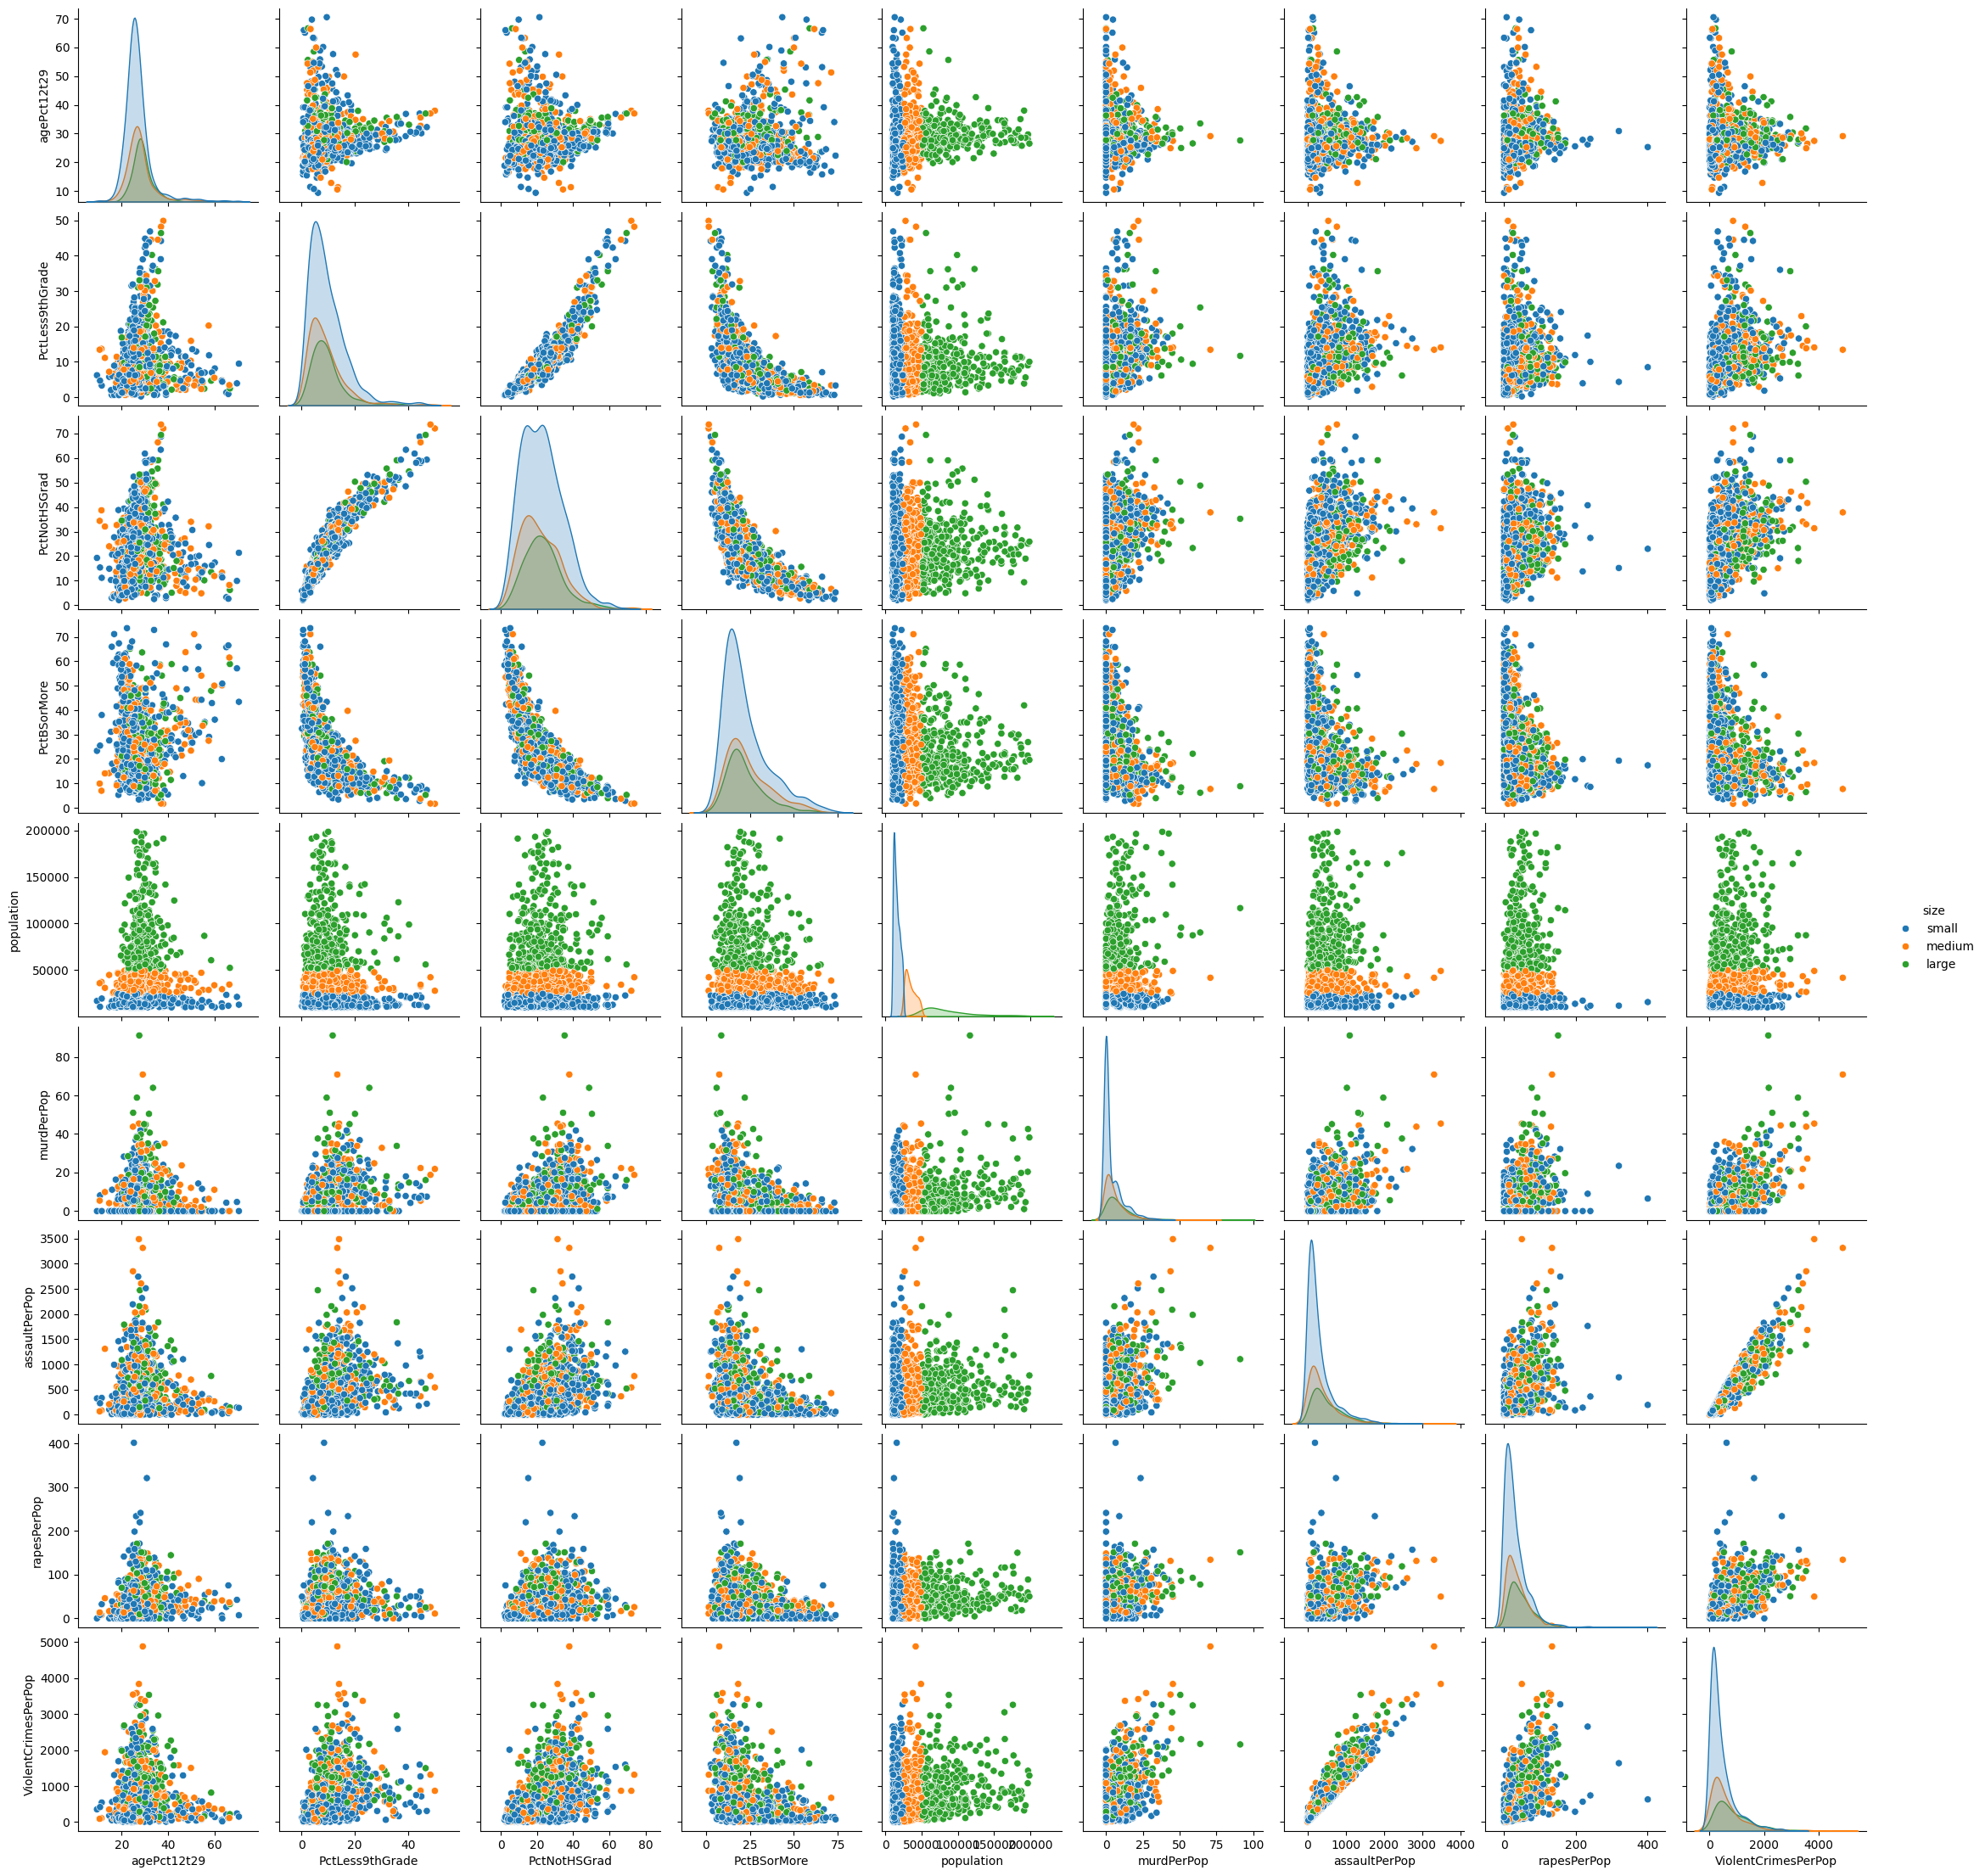

In [327]:
columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop',
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop', 'size']
sns.pairplot(crime_in[columns], hue= 'size')

crime_in_less = crime_in[crime_in['population'] < 200000]
sns.pairplot(crime_in_less[columns], hue= 'size')

In [328]:
# correlation matrix
corrcolumns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop',
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop']
crime_small = crime_in.loc[crime_in['size'] == 'small']
crime_medium = crime_in.loc[crime_in['size'] == 'medium']
crime_large = crime_in.loc[crime_in['size'] == 'large']
crime_superLarge = crime_in.loc[crime_in['size'] == 'superLarge']

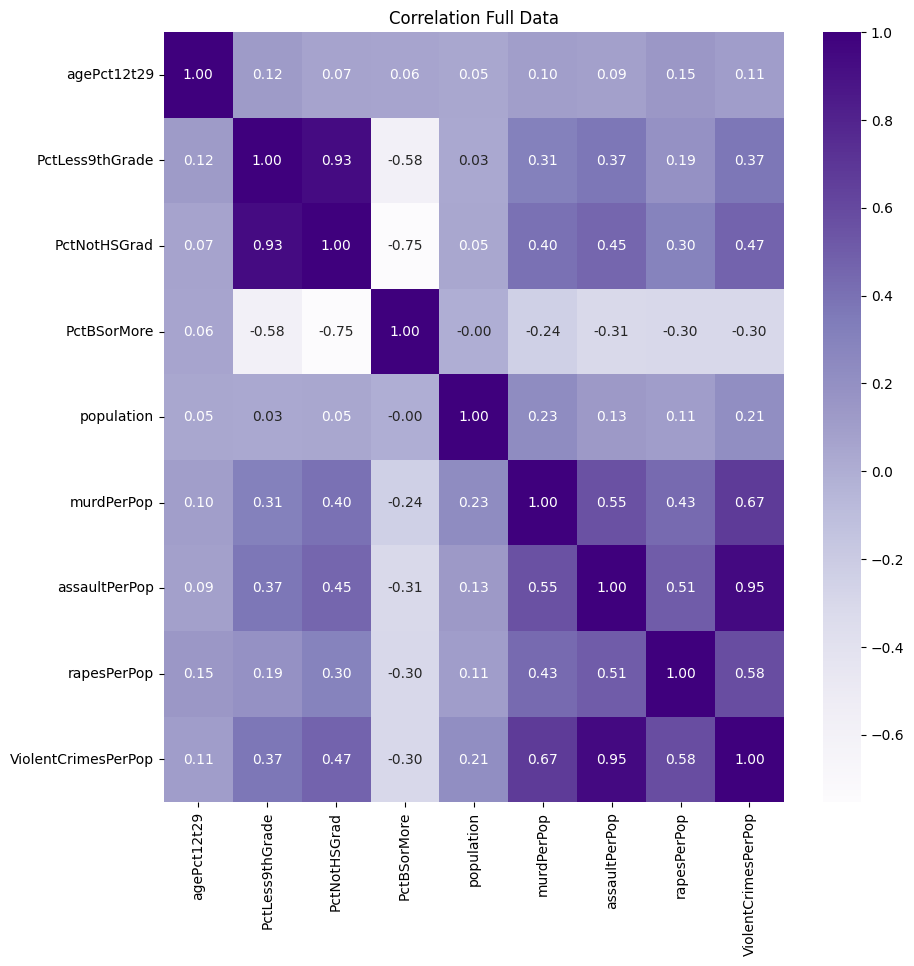

In [329]:
corr = crime_in[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Purples')
plt.title('Correlation Full Data')
plt.show()

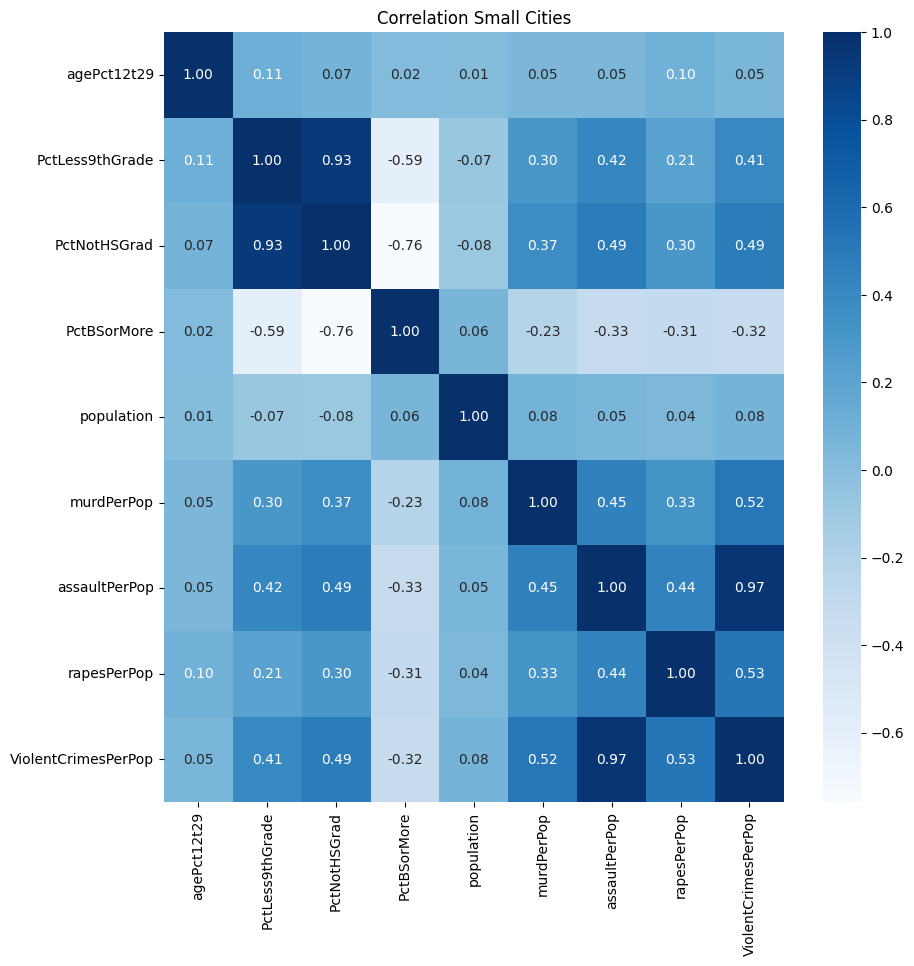

In [330]:
corr = crime_small[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Small Cities')
plt.show()

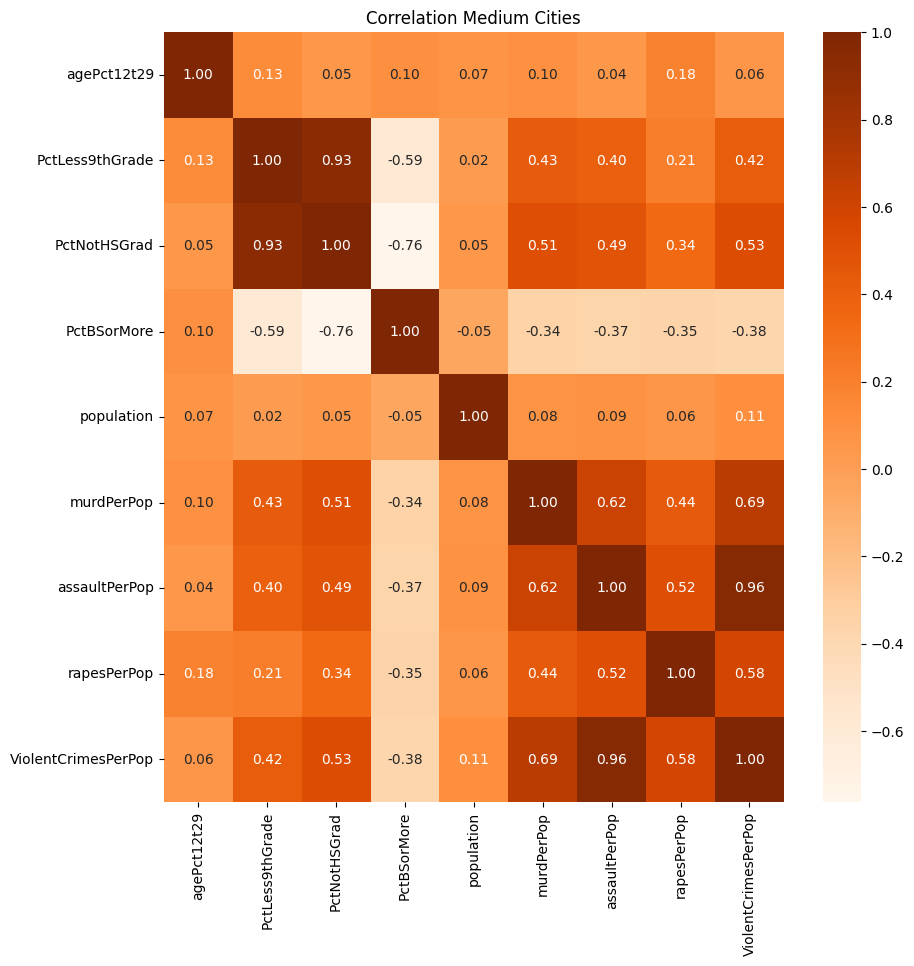

In [331]:
corr = crime_medium[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Oranges')
plt.title('Correlation Medium Cities')
plt.show()

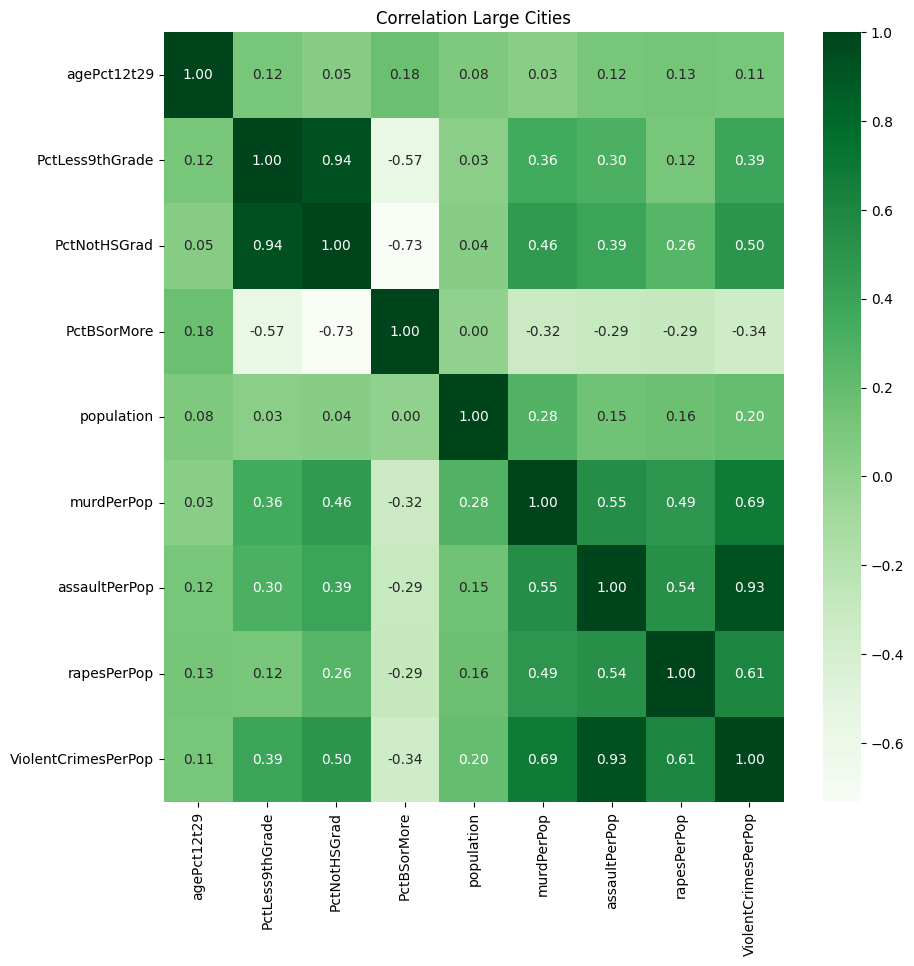

In [332]:
corr = crime_large[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Greens')
plt.title('Correlation Large Cities')
plt.show()

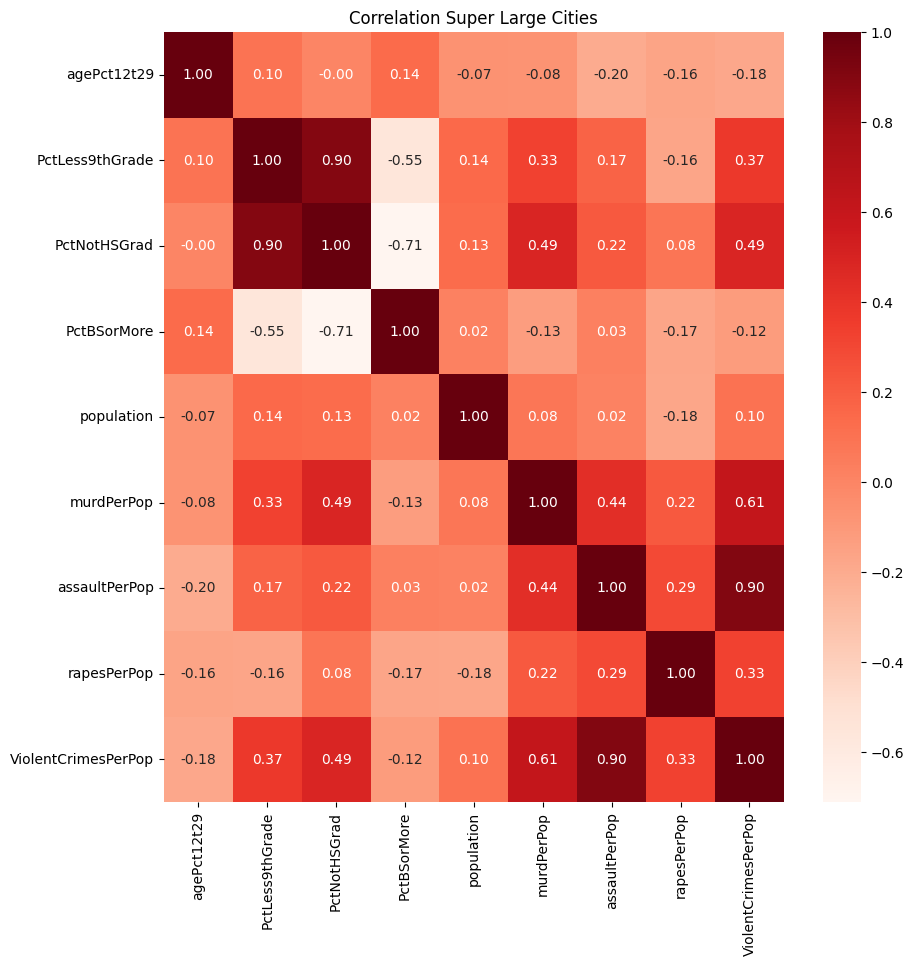

In [333]:
corr = crime_superLarge[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Reds')
plt.title('Correlation Super Large Cities')
plt.show()

In [334]:
columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop',
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop', 'size']
crime_clean_set = crime_in[columns]


In [335]:
crime_clean_set.to_csv('crime_clean_set.csv', index=False)

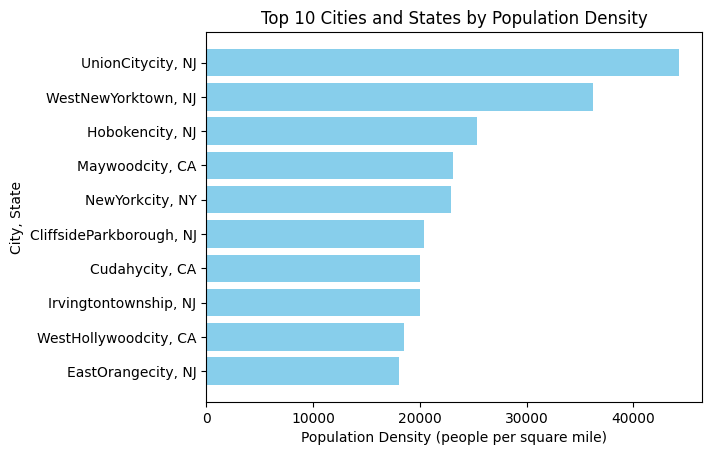

In [336]:
crime_in = pd.read_csv('crimedata2.csv')

top_10 = crime_in.sort_values(by='PopDens', ascending=False).head(10)
top_10['City_State'] = top_10['communityname'] + ', ' + top_10['state']

plt.barh(top_10['City_State'], top_10['PopDens'], color='skyblue')

plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Population Density (people per square mile)')
plt.ylabel('City, State')
plt.title('Top 10 Cities and States by Population Density')

# Show the plot
plt.show()

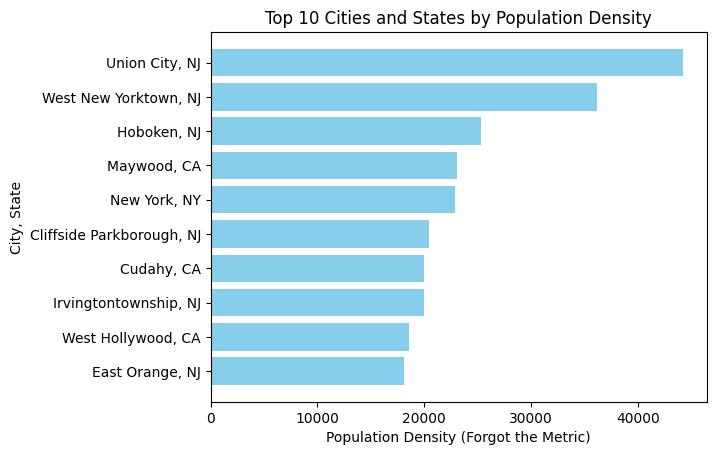

In [337]:
import matplotlib.pyplot as plt


def clean_city_name(city):
    
    if city.endswith('city'):
        city = city[:-4]  #
    
    
    cleaned_city = ''
    for i, char in enumerate(city):
        if i > 0 and char.isupper() and city[i-1].islower():  
            cleaned_city += ' '  
        cleaned_city += char  
    
    return cleaned_city


top_10 = crime_in.sort_values(by='PopDens', ascending=False).head(10)
top_10['communityname'] = top_10['communityname'].apply(clean_city_name)


top_10['City_State'] = top_10['communityname'] + ', ' + top_10['state']


plt.barh(top_10['City_State'], top_10['PopDens'], color='skyblue')

#
plt.gca().invert_yaxis()


plt.xlabel('Population Density (Forgot the Metric)')
plt.ylabel('City, State')
plt.title('Top 10 Cities and States by Population Density')


plt.show()

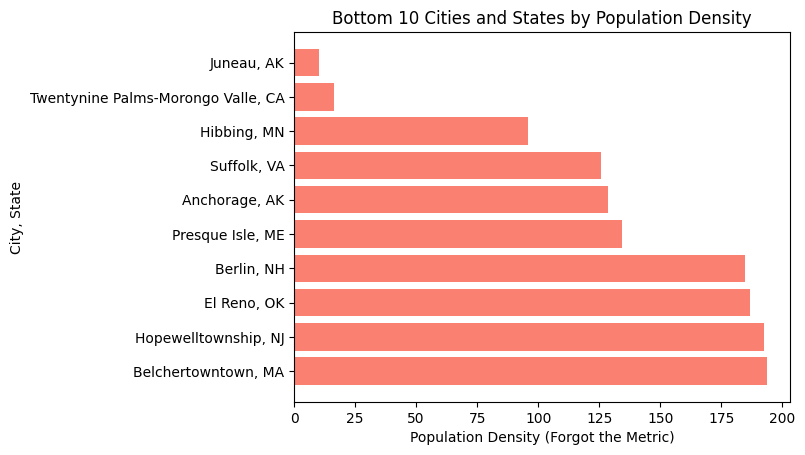

In [338]:
import matplotlib.pyplot as plt

def clean_city_name(city):
    if city.endswith('city'):
        city = city[:-4]
    
    cleaned_city = ''
    for i, char in enumerate(city):
        if i > 0 and char.isupper() and city[i-1].islower():
            cleaned_city += ' '
        cleaned_city += char
    
    return cleaned_city

# Get the bottom 10 cities by population density
bottom_10 = crime_in.sort_values(by='PopDens', ascending=True).head(10)
bottom_10['communityname'] = bottom_10['communityname'].apply(clean_city_name)

bottom_10['City_State'] = bottom_10['communityname'] + ', ' + bottom_10['state']

plt.barh(bottom_10['City_State'], bottom_10['PopDens'], color='salmon')

plt.gca().invert_yaxis()

plt.xlabel('Population Density (Forgot the Metric)')
plt.ylabel('City, State')
plt.title('Bottom 10 Cities and States by Population Density')

plt.show()

## FULL DATASET MODELS

In [339]:
# train/test split
from sklearn.model_selection import train_test_split
X = crime_clean_set.drop(columns=['ViolentCrimesPerPop', 'size'])
y = crime_clean_set['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1495, 8), (499, 8), (1495,), (499,))

### LIN REG FULL DATA

Mean Squared Error: 19519.204470216977
Root Mean Squared Error: 139.71114654964714


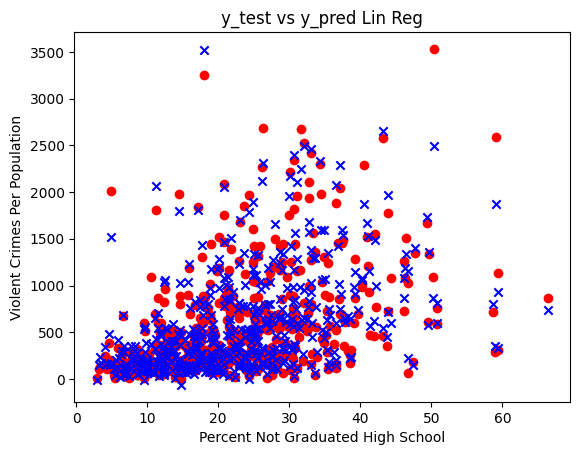

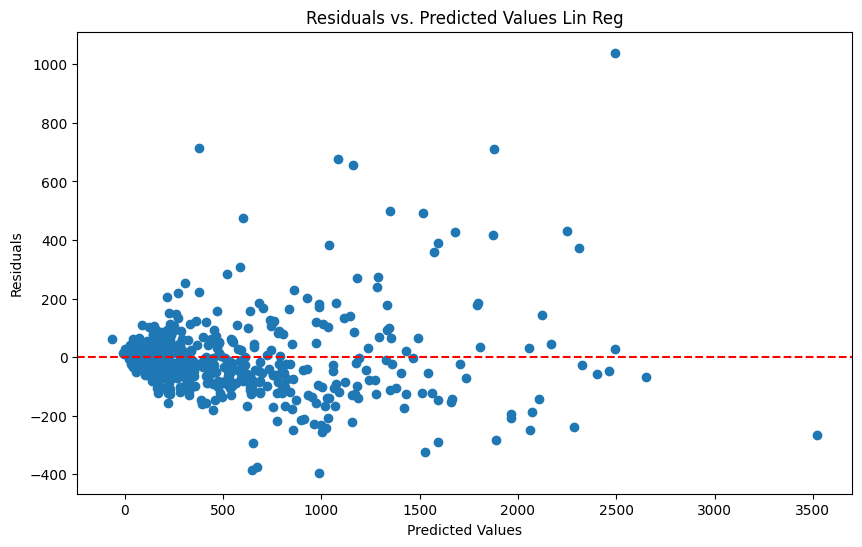

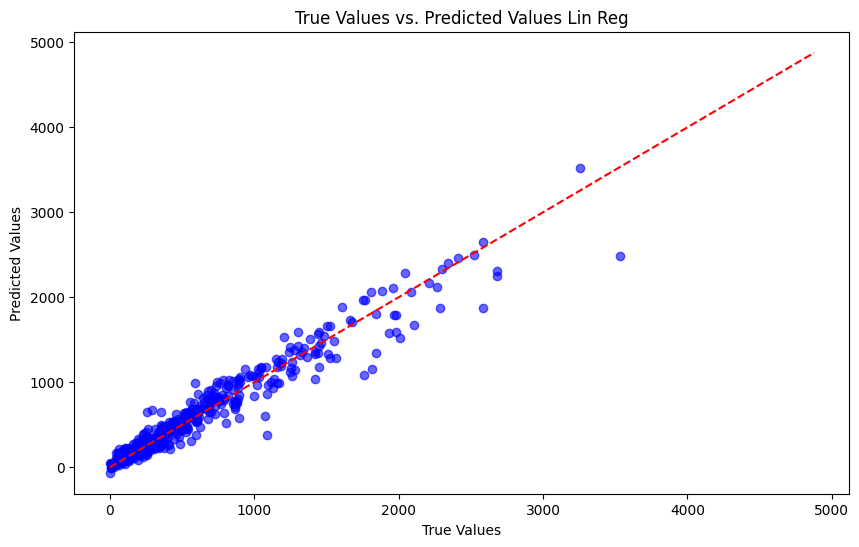

In [340]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# # show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,2], y_test, color='red')
plt.scatter(X_test.iloc[:,2], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Lin Reg')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


### RANDOM FOREST FULL DATA

Mean Squared Error: 19402.544642335935
Root Mean Squared Error: 139.2930172059459


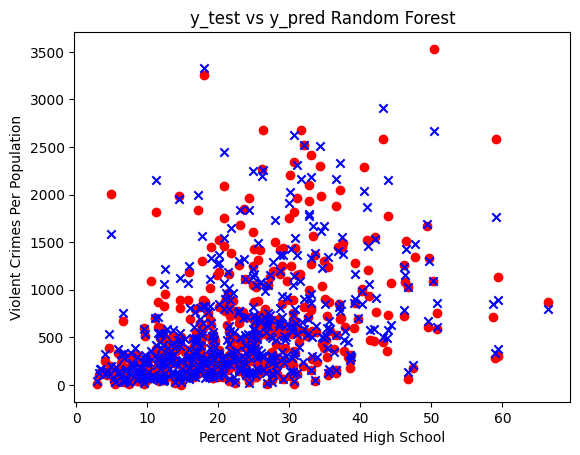

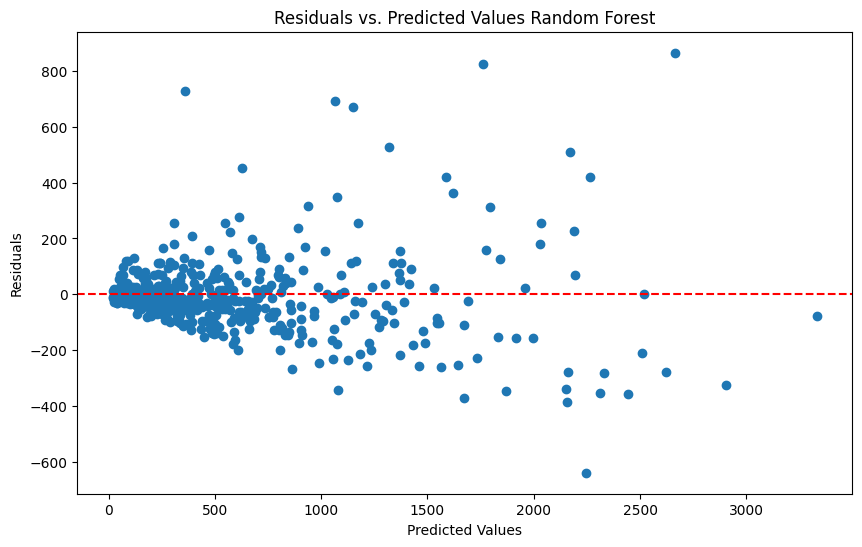

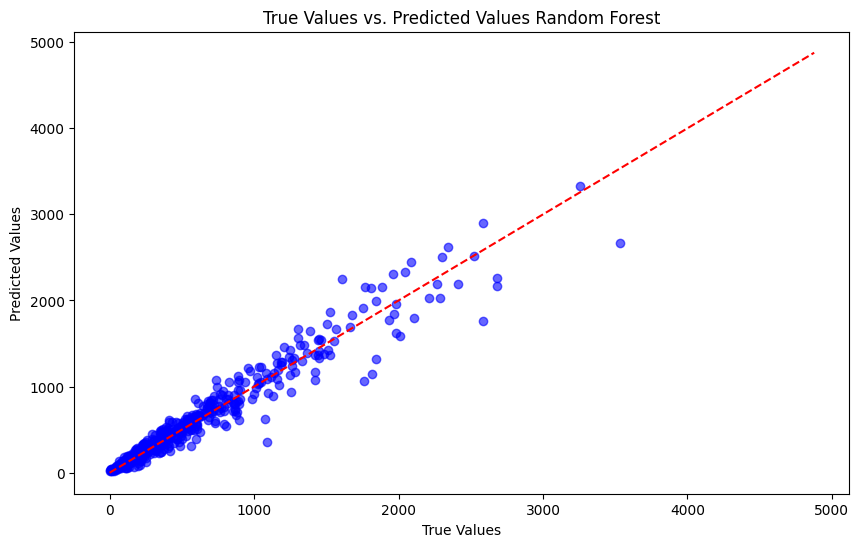

In [341]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,2], y_test, color='red')
plt.scatter(X_test.iloc[:,2], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Random Forest')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### DECISION TREE FULL DATA

Mean Squared Error: 55360.10217955913
Root Mean Squared Error: 235.2872758556211


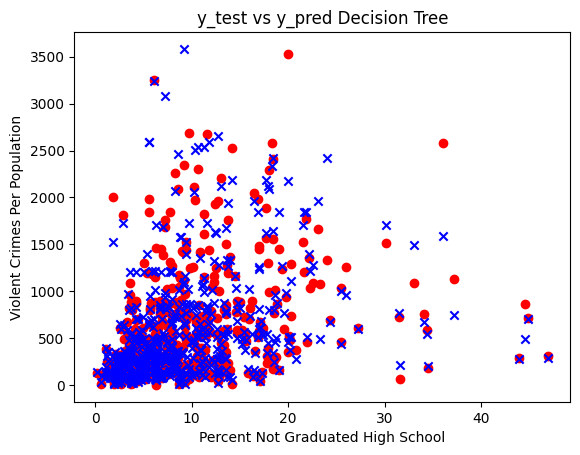

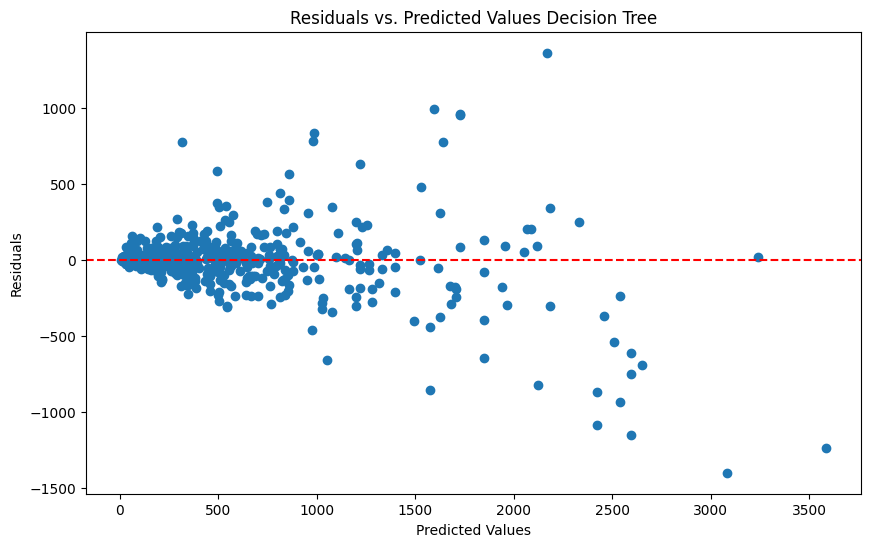

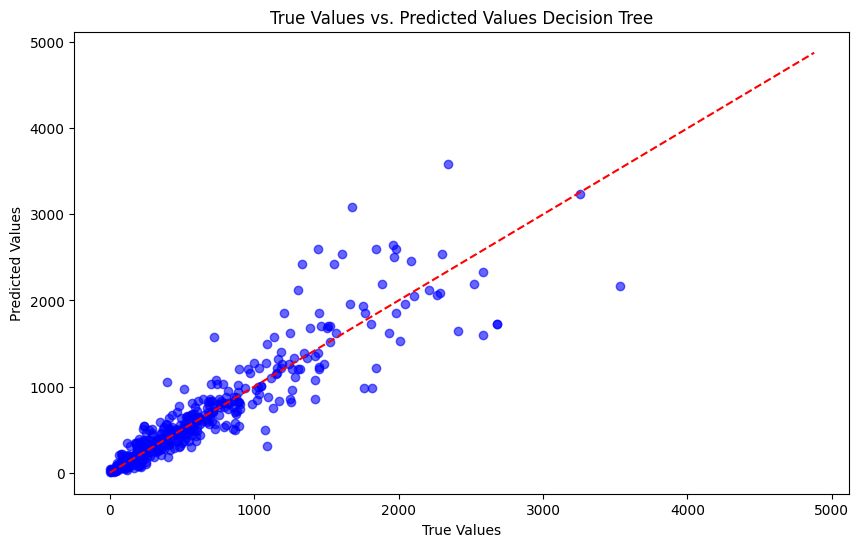

In [342]:
# deciesion tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Decision Tree')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## MEDIUM CITIES MODELS

In [343]:
# same for medium cities
# train/test split
from sklearn.model_selection import train_test_split
crime_clean_med = crime_clean_set.loc[crime_clean_set['size'] == 'medium']
X = crime_clean_med.drop(columns=['ViolentCrimesPerPop', 'size'])
y = crime_clean_med['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((366, 8), (122, 8), (366,), (122,))

### LIN REG MED

Mean Squared Error: 38362.03828075921
Root Mean Squared Error: 195.86229417822923


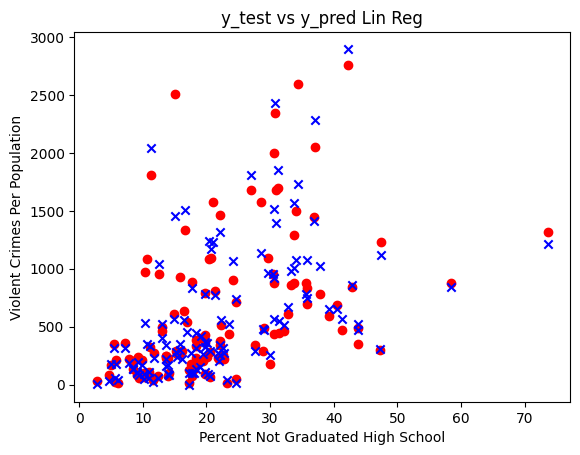

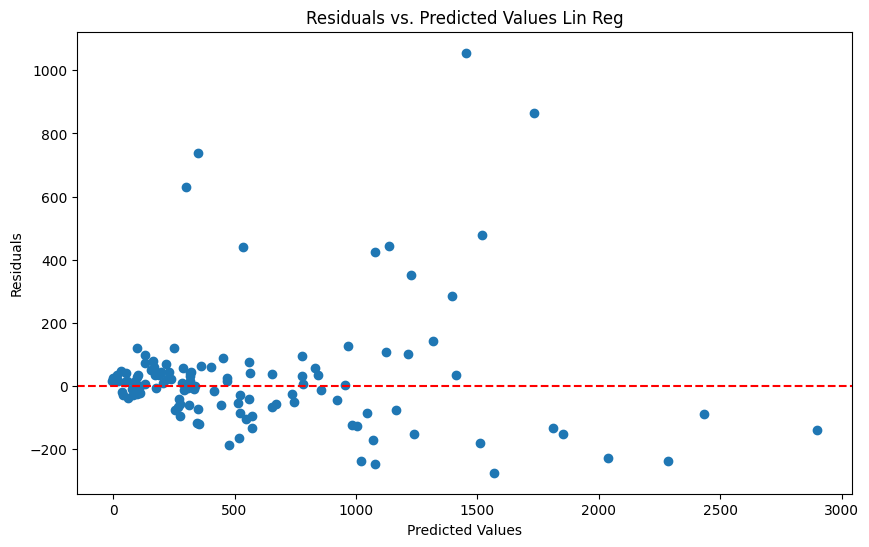

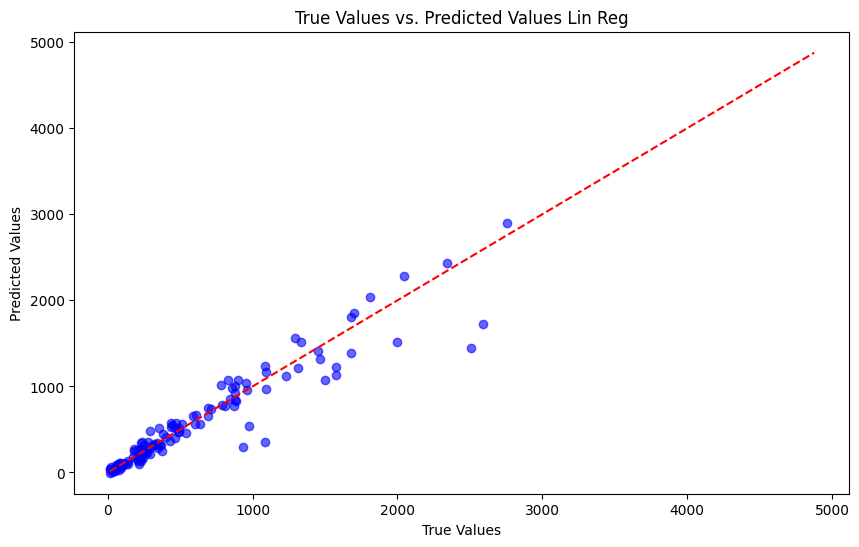

In [344]:
# linear regression MEDIUM CITIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# # show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,2], y_test, color='red')
plt.scatter(X_test.iloc[:,2], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Lin Reg')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### RANDOM FOREST MEDIUM

Mean Squared Error: 62906.12682716904
Root Mean Squared Error: 250.81093841212157


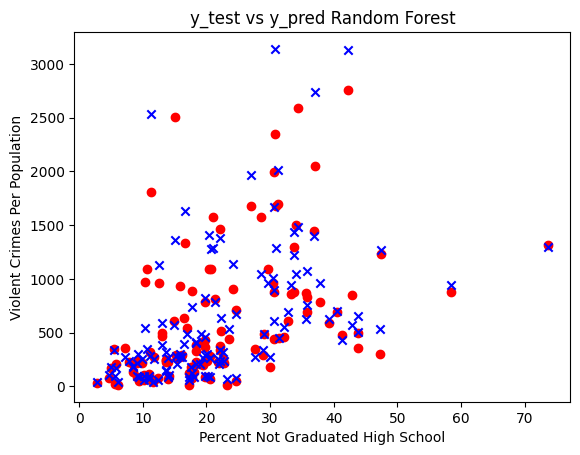

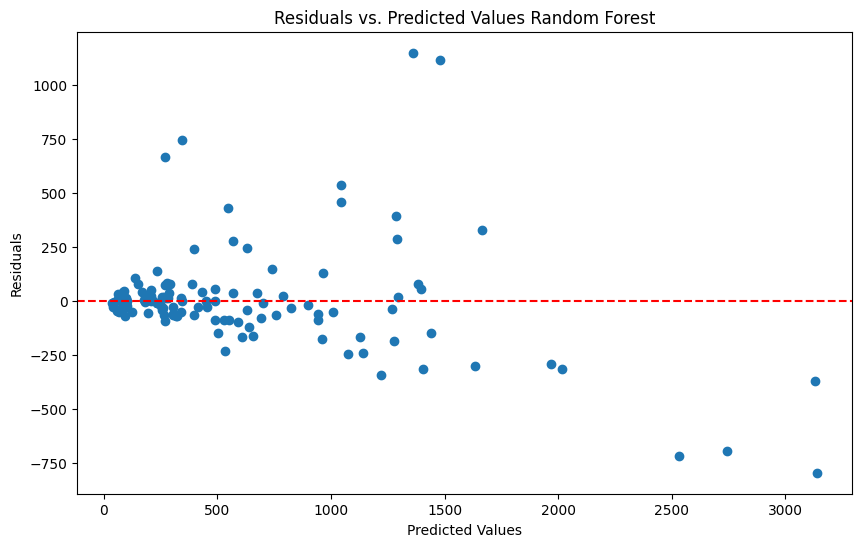

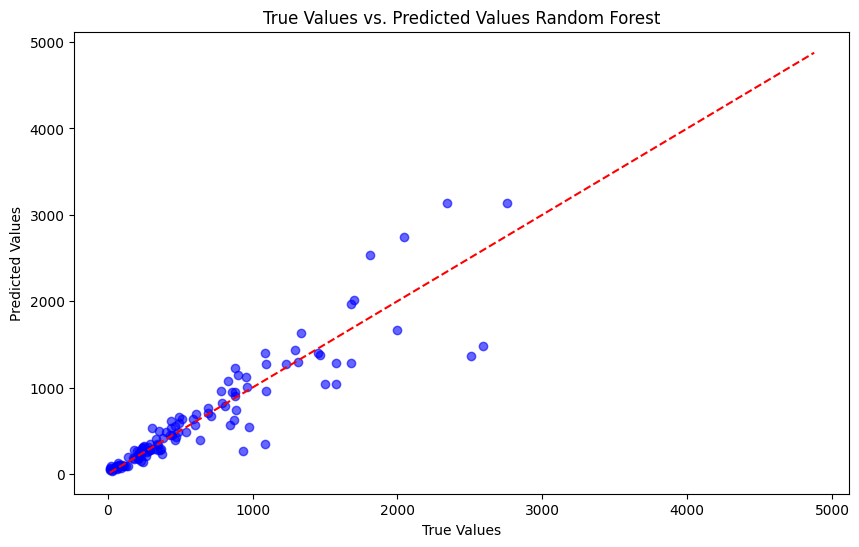

In [345]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,2], y_test, color='red')
plt.scatter(X_test.iloc[:,2], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Random Forest')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### DECISION TREE MEDIUM

Mean Squared Error: 77211.65263032788
Root Mean Squared Error: 277.86984836489165


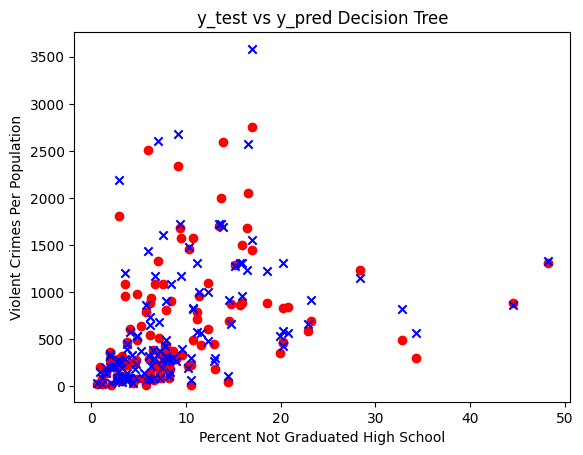

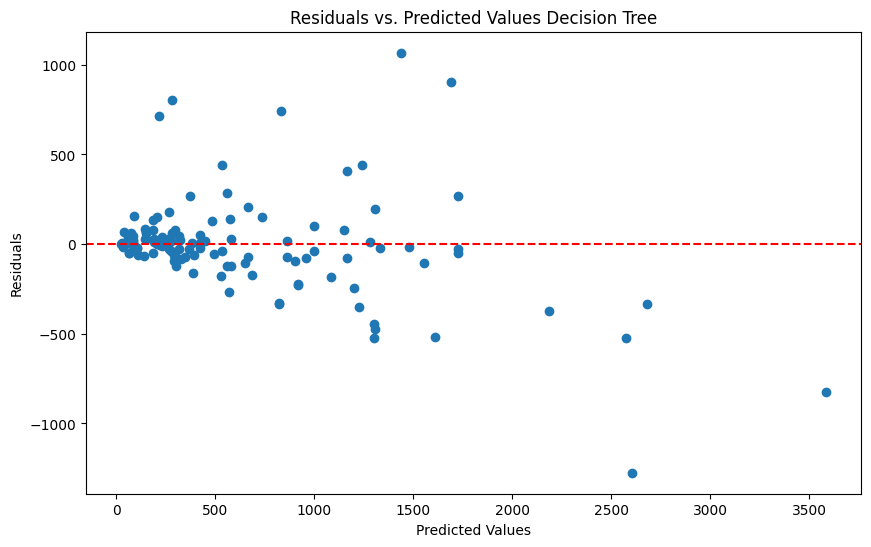

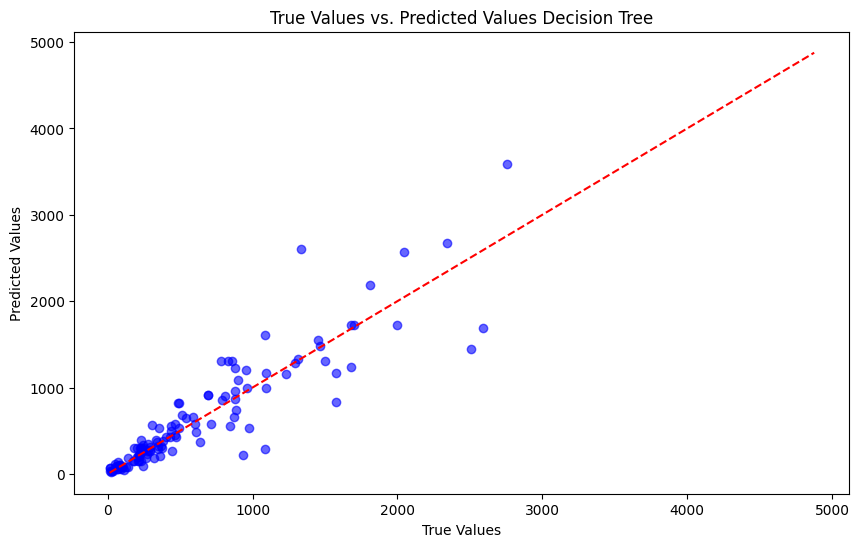

In [346]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Decision Tree')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## SMALL CITIES MODELS

In [347]:
# same for small cities
# train/test split
from sklearn.model_selection import train_test_split
crime_clean_small = crime_clean_set.loc[crime_clean_set['size'] == 'small']
X = crime_clean_small.drop(columns=['ViolentCrimesPerPop', 'size'])
y = crime_clean_small['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((817, 8), (273, 8), (817,), (273,))

### LIN REG SMALL CITIES

Mean Squared Error: 10783.784751077685
Root Mean Squared Error: 103.84500349596838


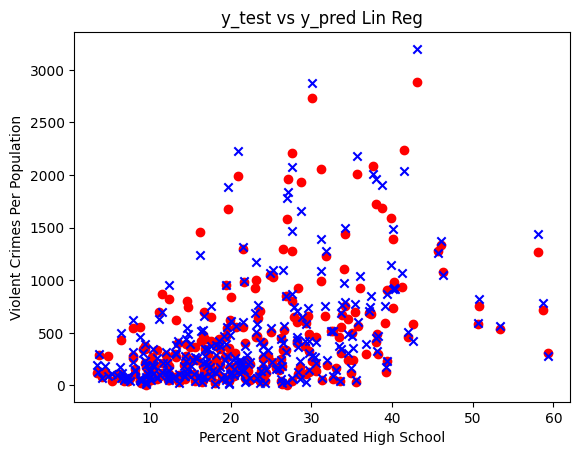

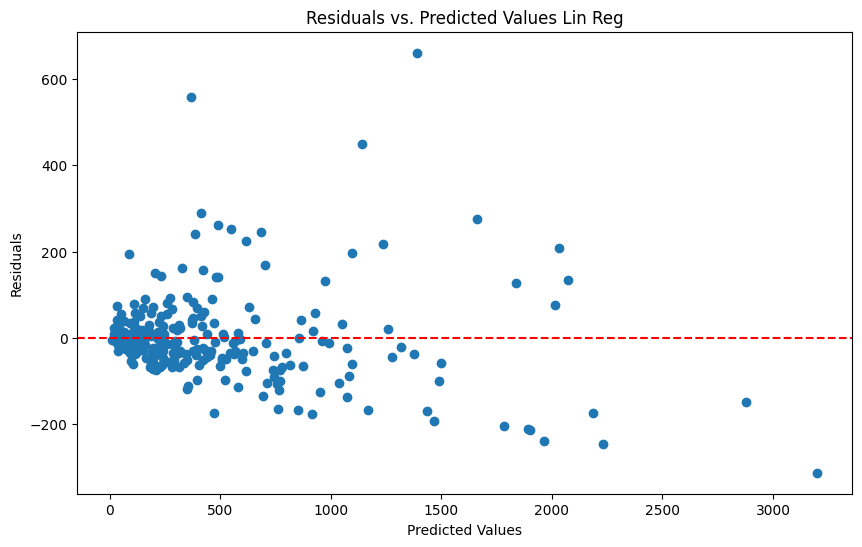

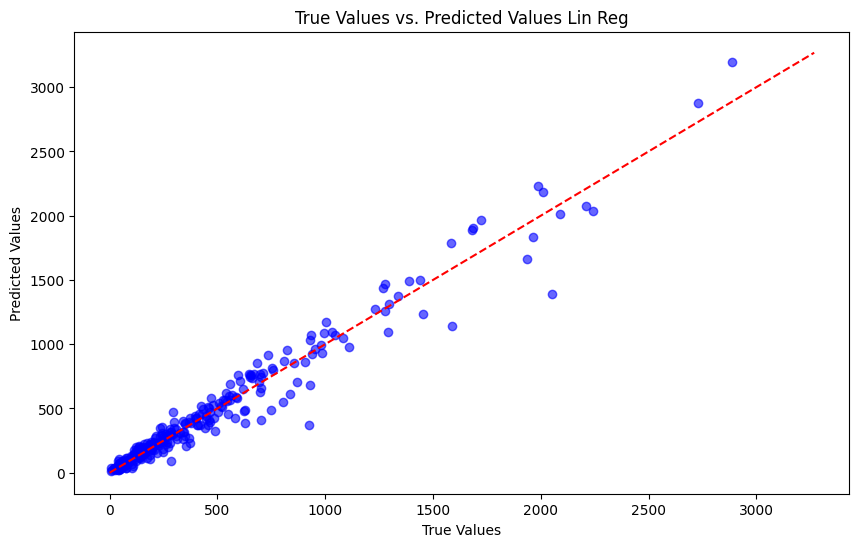

In [348]:
# linear regression SMALL CITIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# # show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,2], y_test, color='red')
plt.scatter(X_test.iloc[:,2], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Lin Reg')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### RANDOM FOREST SMALL CITIES

Mean Squared Error: 14748.681611038463
Root Mean Squared Error: 121.44415017216129


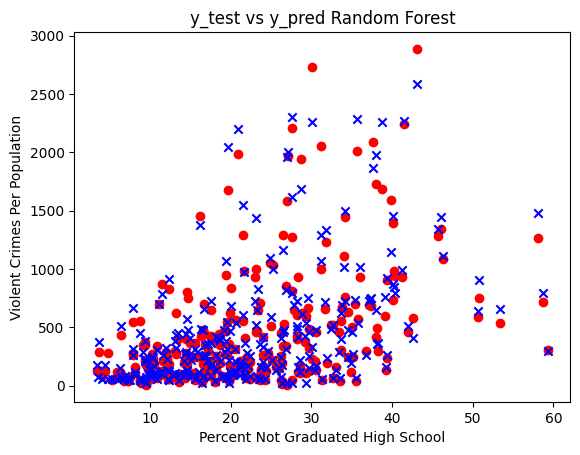

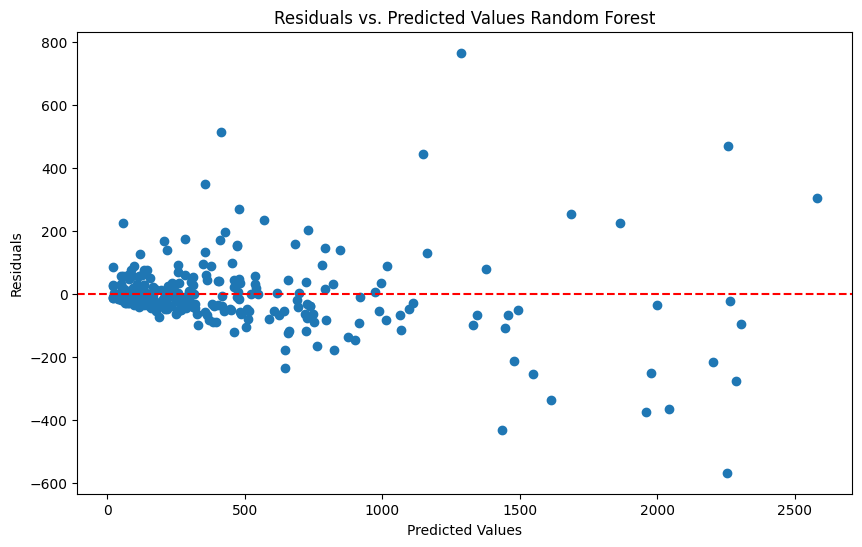

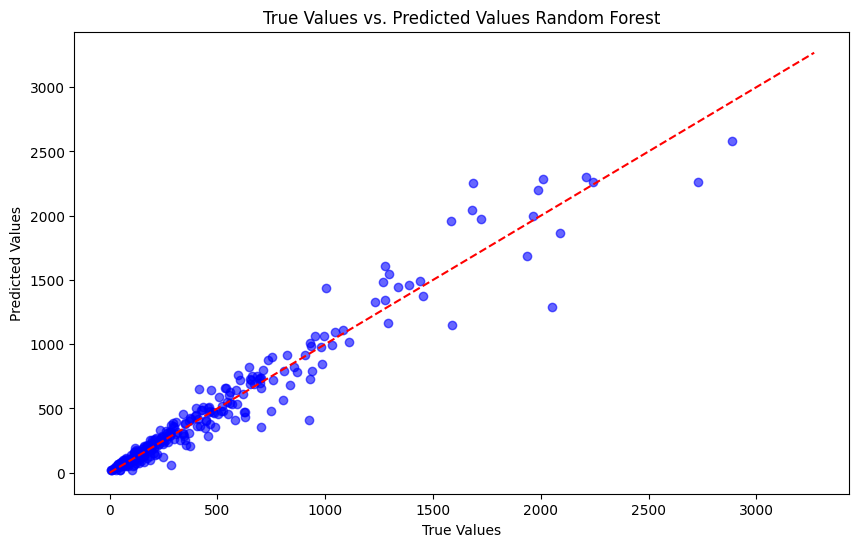

In [349]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,2], y_test, color='red')
plt.scatter(X_test.iloc[:,2], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Random Forest')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### DECISION TREE SMALL CITIES

Mean Squared Error: 33488.267898901104
Root Mean Squared Error: 182.99799971284142


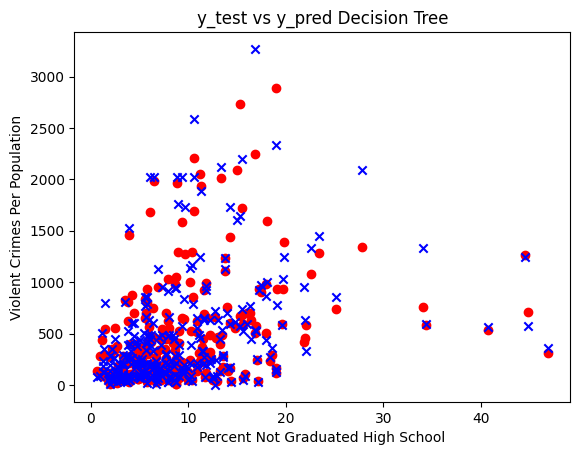

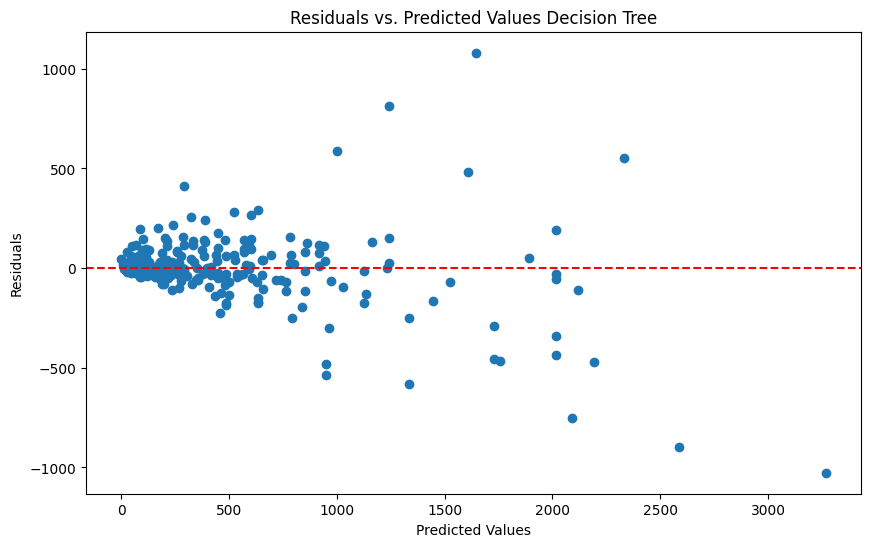

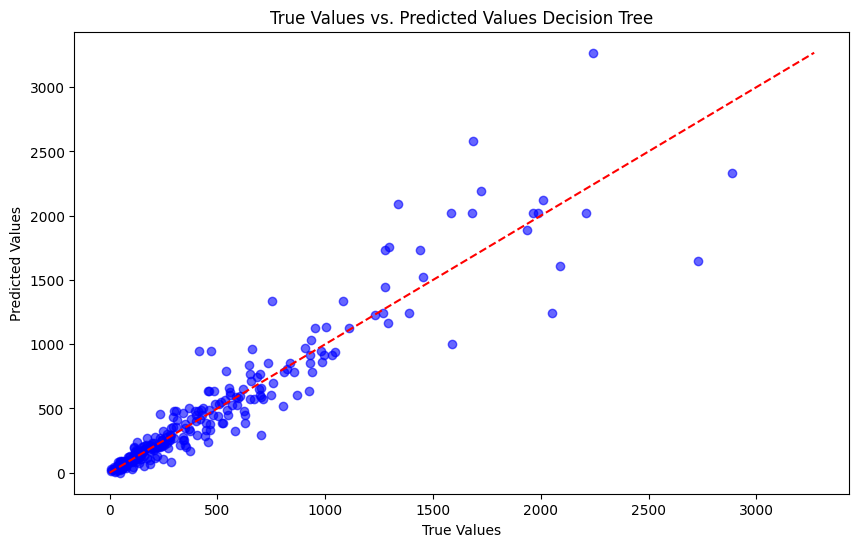

In [350]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Decision Tree')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## LARGE CITY MODELS

In [351]:
# same for Large cities
# train/test split
from sklearn.model_selection import train_test_split
crime_clean_large = crime_clean_set.loc[crime_clean_set['size'] == 'small']
X = crime_clean_large.drop(columns=['ViolentCrimesPerPop', 'size'])
y = crime_clean_large['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((817, 8), (273, 8), (817,), (273,))

### LIN REG LARGE

Mean Squared Error: 10783.784751077685
Root Mean Squared Error: 103.84500349596838


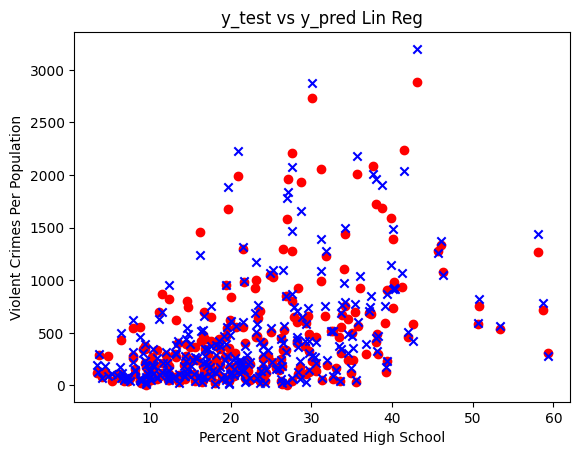

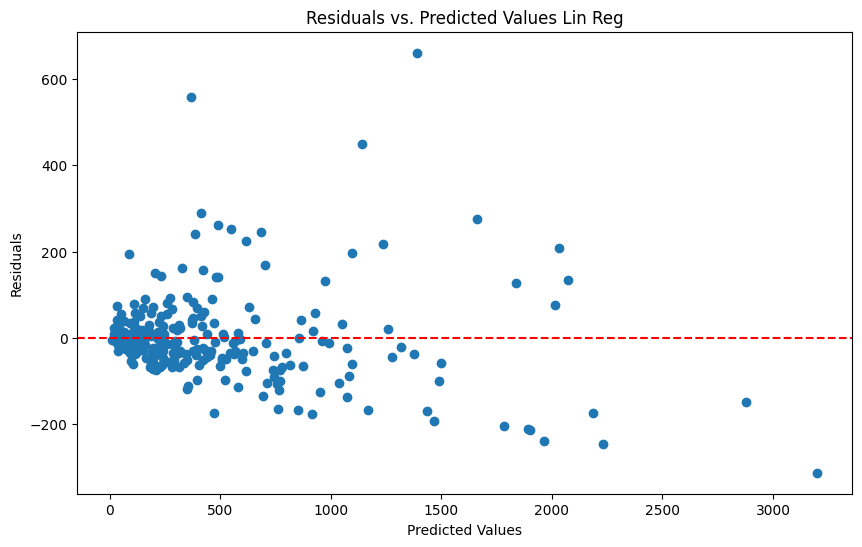

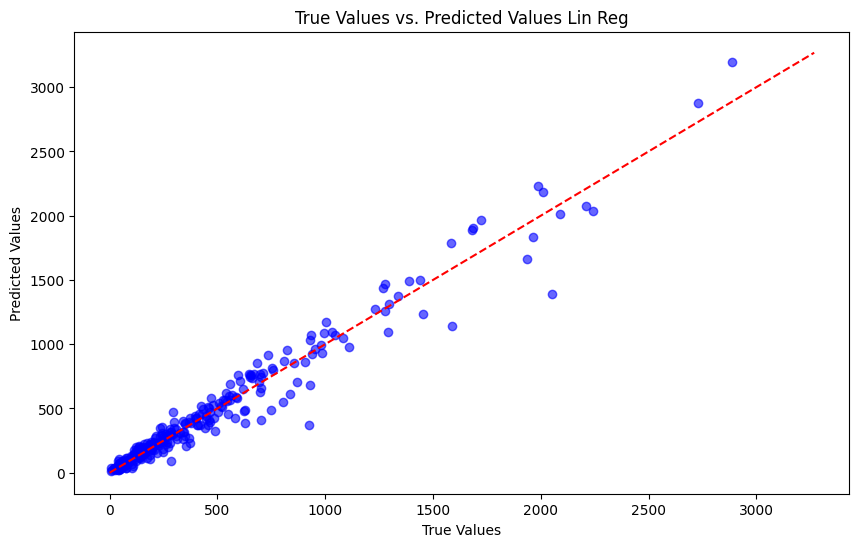

In [352]:
# linear regression MEDIUM CITIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# # show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,2], y_test, color='red')
plt.scatter(X_test.iloc[:,2], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Lin Reg')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### RANDOM FOREST LARGE

Mean Squared Error: 15253.36727225004
Root Mean Squared Error: 123.50452328659885


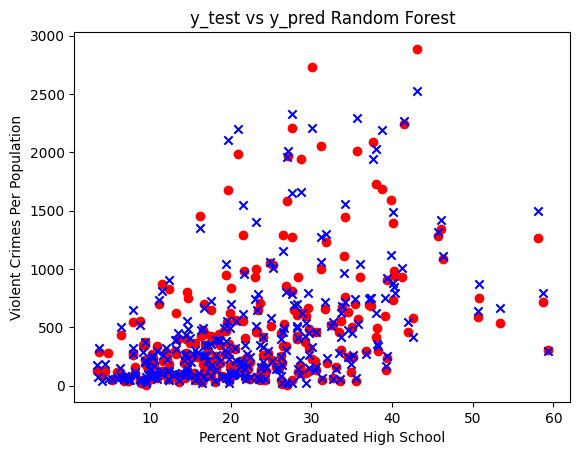

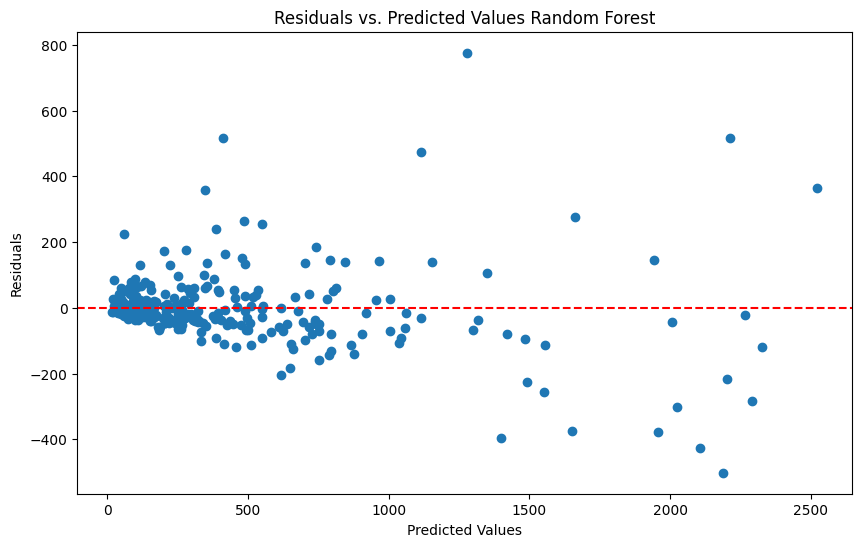

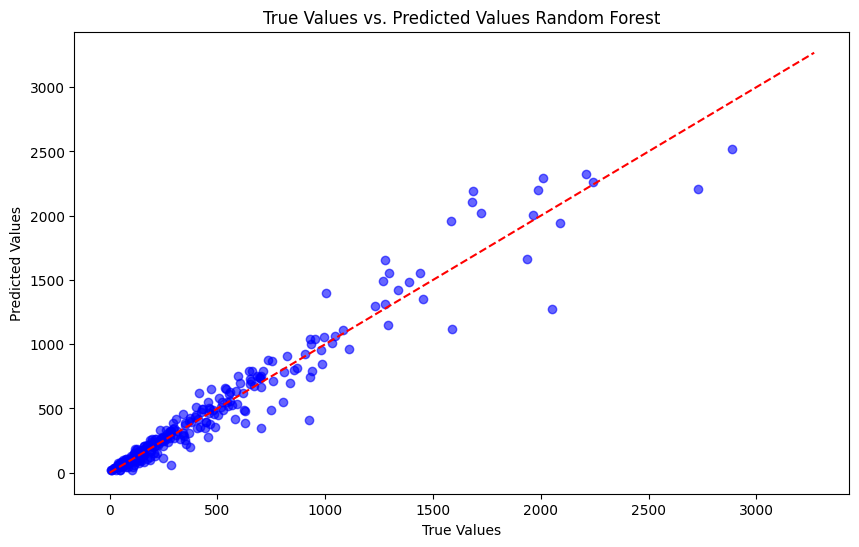

In [353]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,2], y_test, color='red')
plt.scatter(X_test.iloc[:,2], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Random Forest')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### DECISION TREES LARGE

Mean Squared Error: 26719.5293010989
Root Mean Squared Error: 163.4610941511738


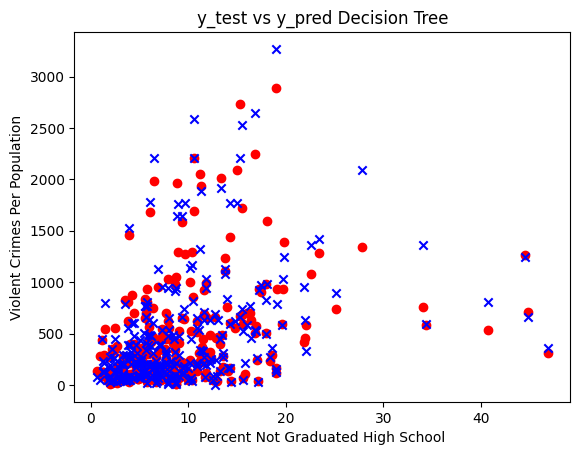

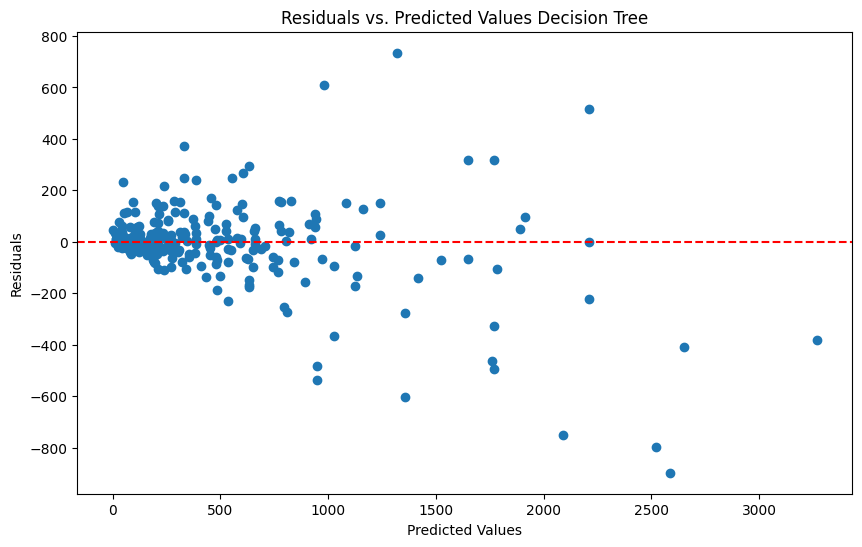

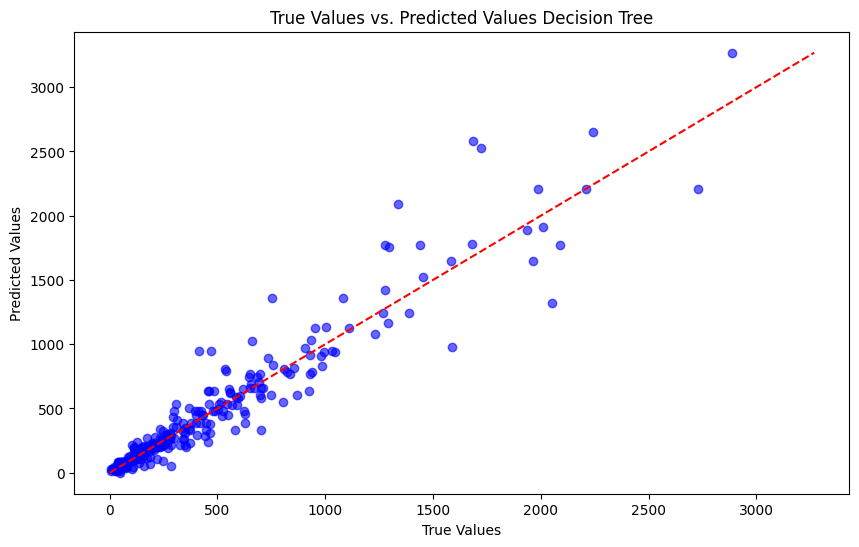

In [354]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Decision Tree')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()